#### SKIN DISEASE CLASSIFICATION

Deep learning to predict the various skin diseases. The main objective of this project is to achieve maximum accuracy of skin disease prediction. Deep learning techniques helps in detection of skin disease at an initial stage. The feature extraction plays a key role in classification of skin diseases.The usage of Deep Learning algorithms reduces the need for human labor, such as manual feature extraction and data reconstruction for classification purpose. Moreover, Explainable AI is used to interpret the decisions made by our model.rmatofibroma



#### About the dataset

HAM10000 ("Human Against Machine with 10000 training images") dataset - a large collection of multi-source dermatoscopic images of pigmented lesions

The dermatoscopic images are collected from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images.

It has 7 different classes of skin cancer which are listed below:

- Melanocytic nevi
- Melanoma
- Benign keratosis-like lesions
- Basal cell carcinoma
- Actinic keratoses
- Vascular lesions
- Dermatofibroma


In [2]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

In [3]:
# Load the metadata
metadata_path = r"C:\Users\web\Downloads\HAM10000_metadata.csv"  # Adjust path if needed
df = pd.read_csv(metadata_path)
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [2]:

# Map lesion types to their full names
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Base directory containing the images
base_skin_dir = r"C:\Users\web\Downloads\image"

# Collect all image paths from subdirectories
imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))
}

# Add columns to the DataFrame
df['path'] = df['image_id'].map(imageid_path_dict)  # Map image paths
df['cell_type'] = df['dx'].map(lesion_type_dict)    # Map lesion types
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes  # Encode cell types

# Check results
print(f"Number of missing paths: {df['path'].isnull().sum()}")  # Should be 0
df.head()  # Preview the DataFrame


Number of missing paths: 0


lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  C:\Users\web\Downloads\image\HAM10000_images_p...   
1  C:\Users\web\Downloads\image\HAM10000_images_p...   
2  C:\Users\web\Downloads\image\HAM10000_images_p...   
3  C:\Users\web\Downloads\image\HAM10000_images_p...   
4  C:\Users\web\Downloads\image\HAM10000_images_p...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2

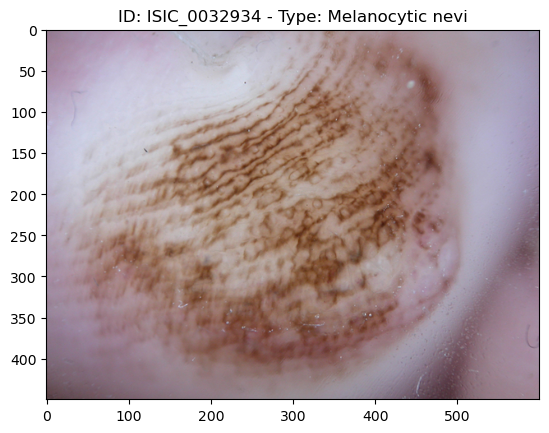

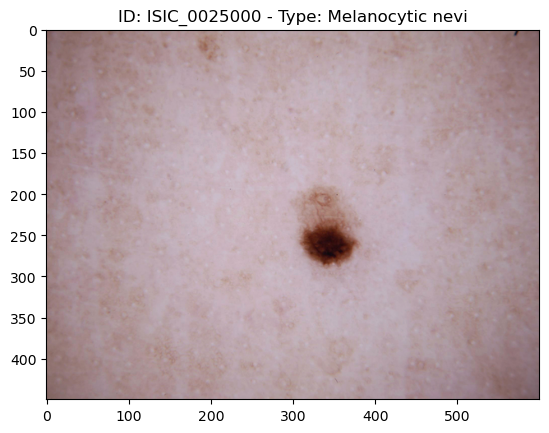

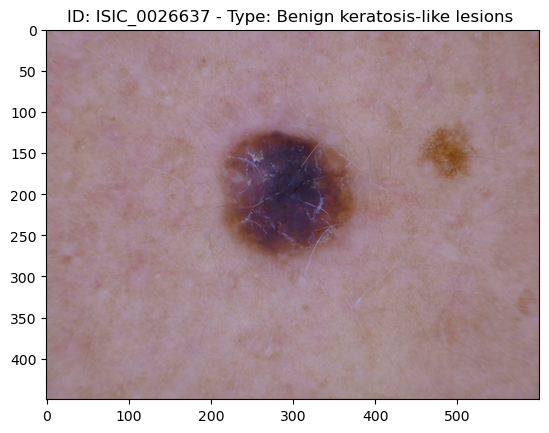

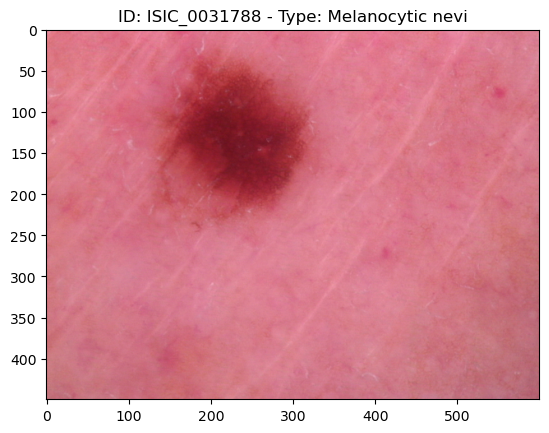

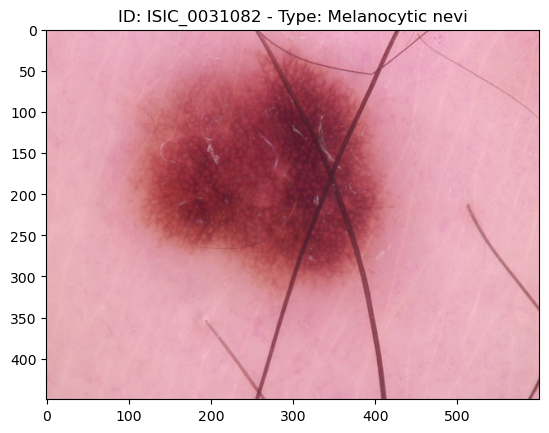

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Pick a few rows to display images
sample_images = df.sample(5)  # Random sample of 5 images
for index, row in sample_images.iterrows():
    img = mpimg.imread(row['path'])
    plt.imshow(img)
    plt.title(f"ID: {row['image_id']} - Type: {row['cell_type']}")
    plt.show()


In [4]:
df.dtypes

lesion_id         object
image_id          object
dx                object
dx_type           object
age              float64
sex               object
localization      object
path              object
cell_type         object
cell_type_idx       int8
dtype: object

In [5]:
df['age'].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

#### Data Cleaning

Removing NULL values and performing visualizations to gain insights of dataset: Univariate and Bivariate Analysis

In [6]:
df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
dtype: int64

The feature 'age' consists of 57 null records. Thus, we need to impute them via KNNImputer, since dropping 57 records would lead to loss of data.

##### Null value imputation via KNNImputer :

In [4]:
from sklearn.impute import KNNImputer

In [5]:
imputer = KNNImputer(n_neighbors=3)  # Adjust n_neighbors
# Apply imputation
df[['age']] = imputer.fit_transform(df[['age']])

In [6]:
df['age'] = df['age'].replace(51.86382808, 50) # the vals are 5,10,15,20,...
# these are at interval of 5
df.isnull().sum() # found 0 nan values

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
dtype: int64

In [10]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  C:\Users\web\Downloads\image\HAM10000_images_p...   
1  C:\Users\web\Downloads\image\HAM10000_images_p...   
2  C:\Users\web\Downloads\image\HAM10000_images_p...   
3  C:\Users\web\Downloads\image\HAM10000_images_p...   
4  C:\Users\web\Downloads\image\HAM10000_images_p...   

                        cell_type  cell_type_idx  
0  Benign keratosis-like lesions               2  
1  Benign keratosis-like lesions               2  
2  Benign keratosis-like lesions               2  
3  Benign keratosis-like lesions               2  
4  Benign keratosis-like lesions               2

#### Image Preprocessing

Resizing of images because the original dimensions of 450 600 3 take long time to process in Neural Networks

In [7]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

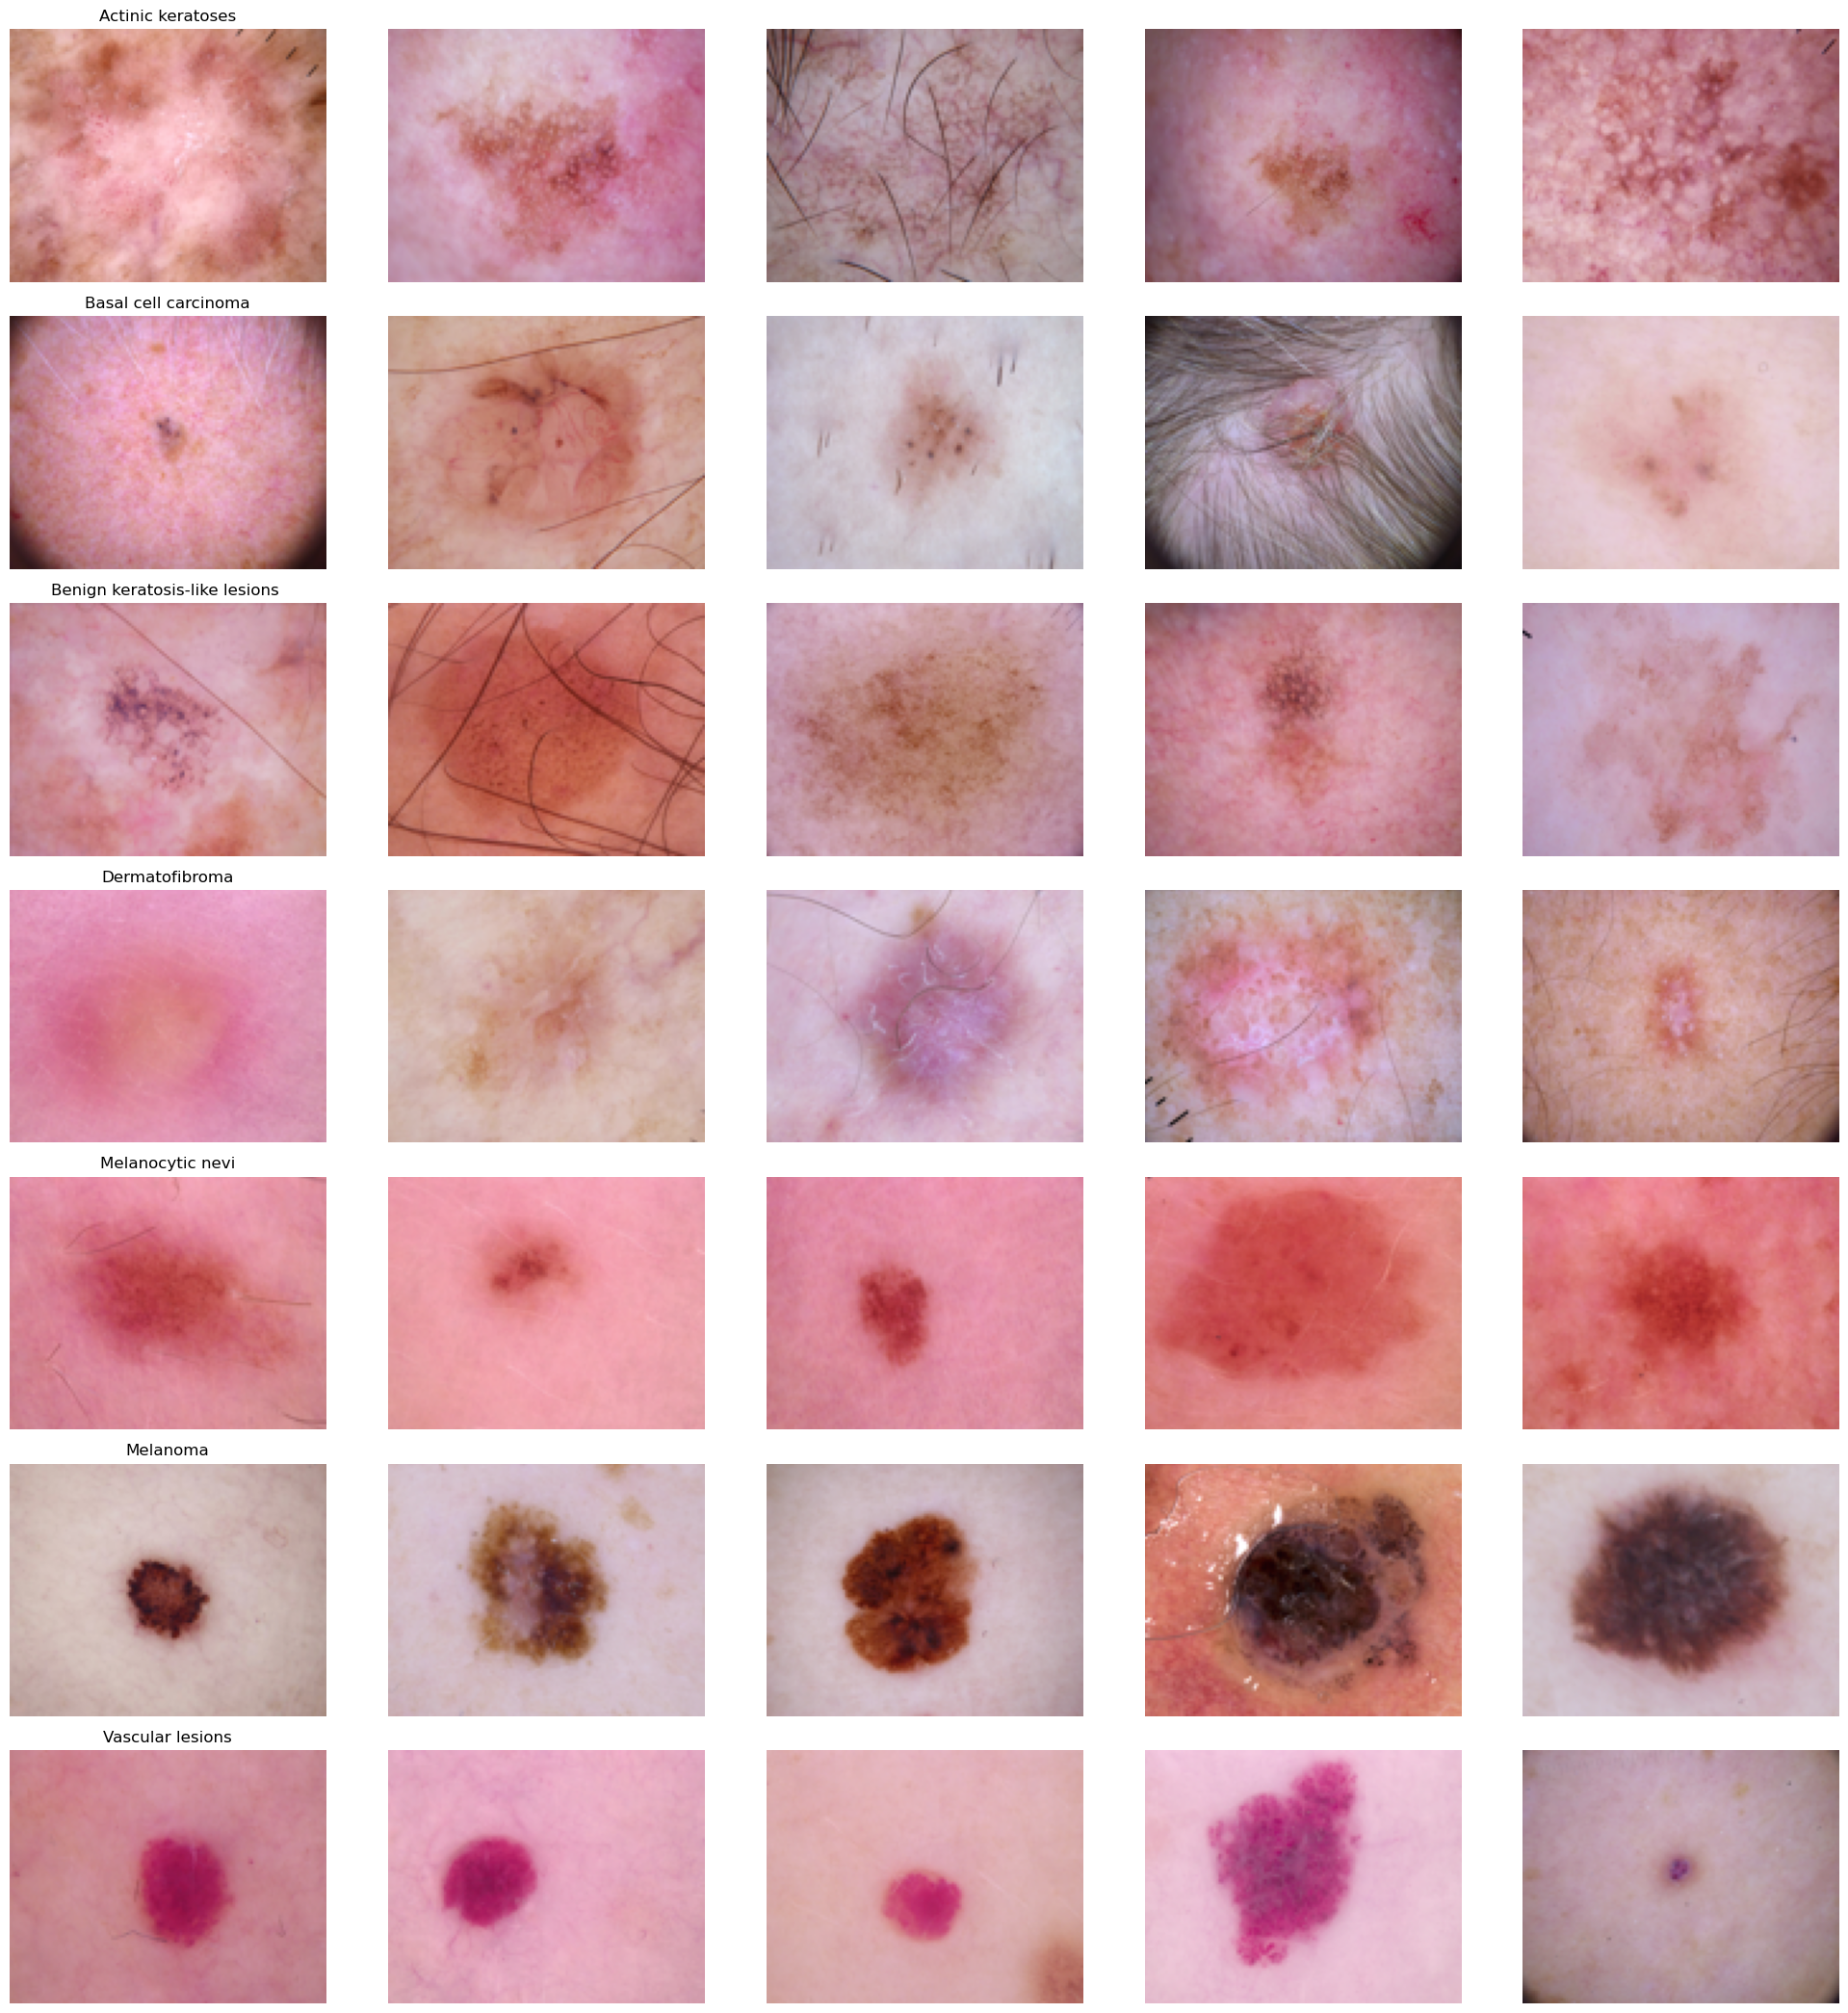

In [12]:
# Set number of samples and figure size
n_samples = 5
fig, axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))

# Group by 'cell_type' and iterate over each group
for ax_row, (type_name, type_rows) in zip(axs, df.groupby('cell_type')):
    ax_row[0].set_title(type_name)  # Set category title
    # Sample n_samples and plot each image
    for ax, (_, row) in zip(ax_row, type_rows.sample(n_samples, random_state=2018).iterrows()):
        ax.imshow(row['image'])
        ax.axis('off')

# Save the figure
fig.tight_layout()
fig.savefig('category_samples.png', dpi=300)


In [13]:
df['image'].map(lambda x: x.shape).value_counts() 
#one row bcose all images are uniform

image
(100, 125, 3)    10015
Name: count, dtype: int64

#### Exploratory Data Analysis

Exploratory data analysis can help detect obvious errors, identify outliers in datasets, understand relationships, unearth important factors, find patterns within data, and provide new insights.

In [14]:
df['age'].unique()

array([80.        , 75.        , 60.        , 70.        , 55.        ,
       85.        , 65.        , 40.        , 50.        , 45.        ,
       35.        ,  0.        , 30.        , 51.86382808,  5.        ,
       25.        , 20.        , 10.        , 15.        ])

In [15]:
df.sex.value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [8]:
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']

#### UNIVARIATE ANALYSIS

<Axes: title={'center': 'CELL TYPE'}, xlabel='cell_type', ylabel='Count'>

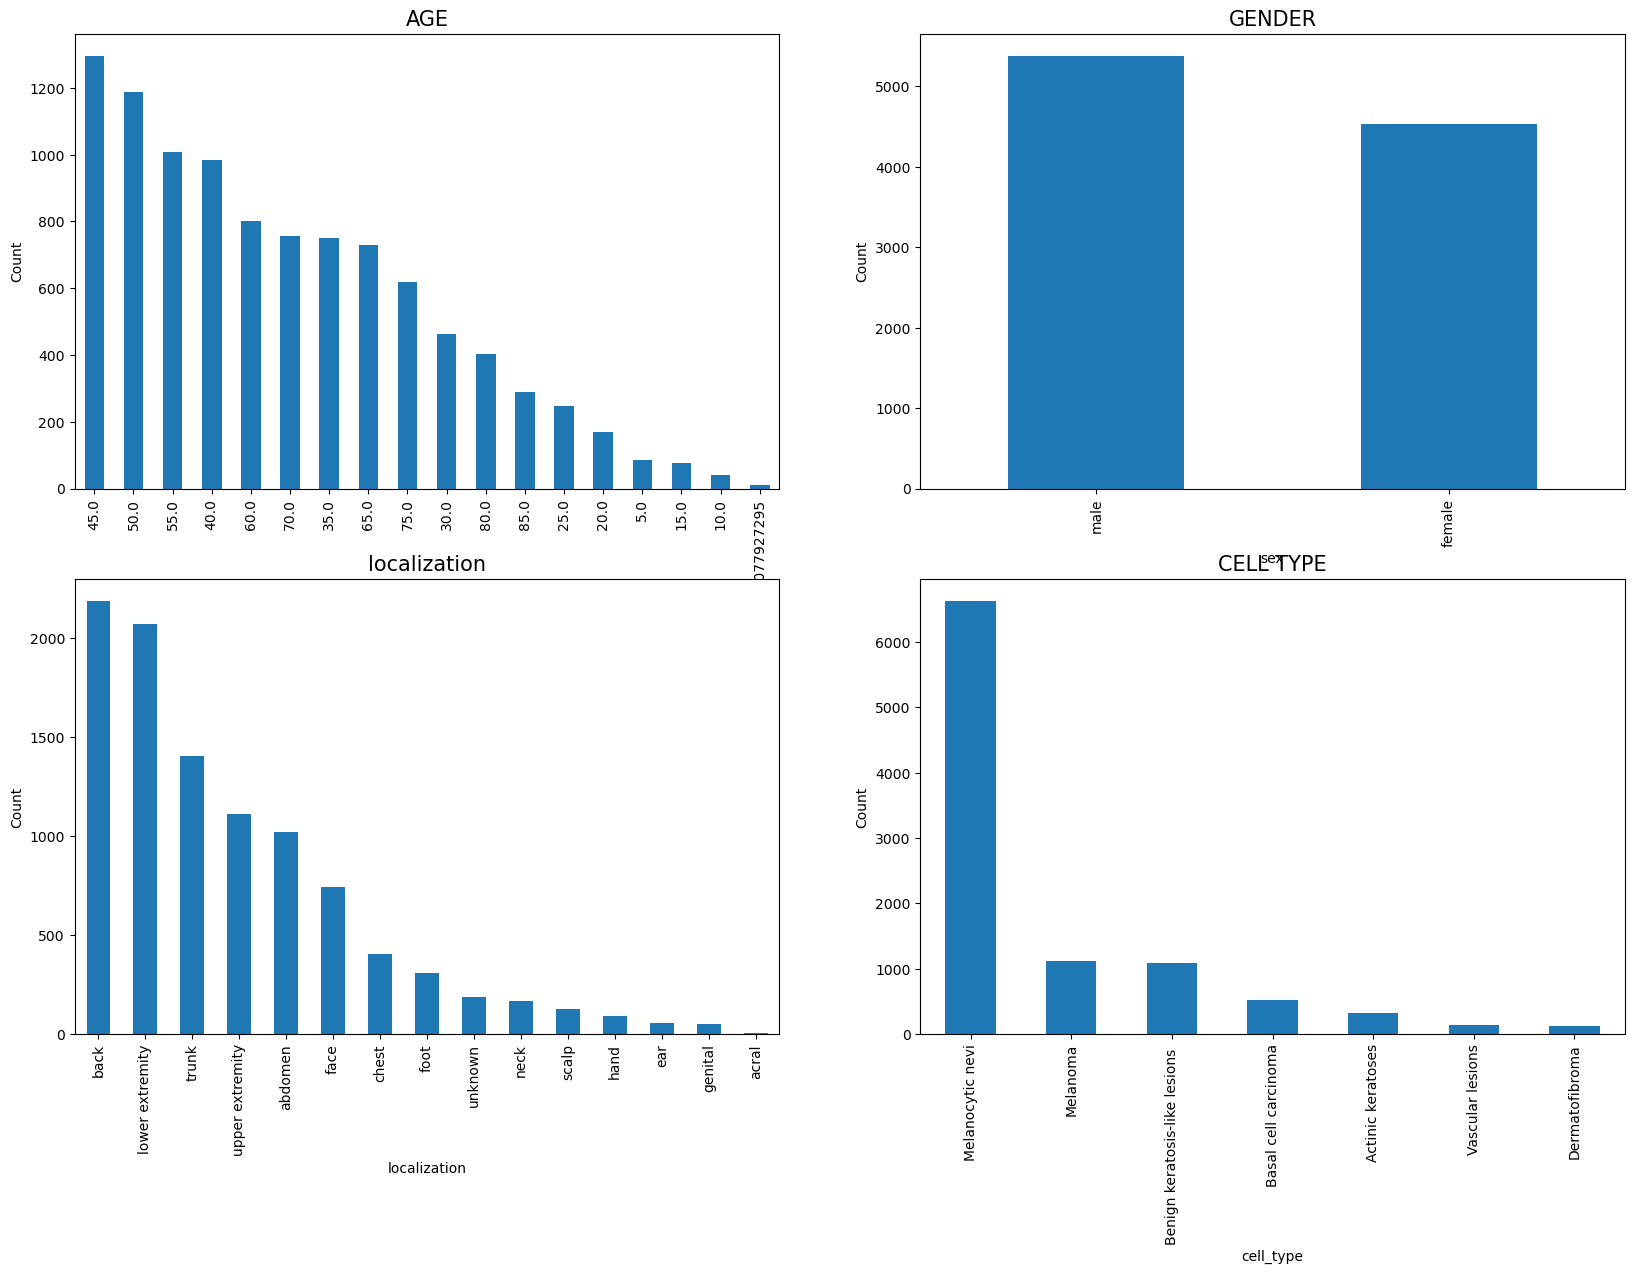

In [17]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,2,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,2,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,2,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,2,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()

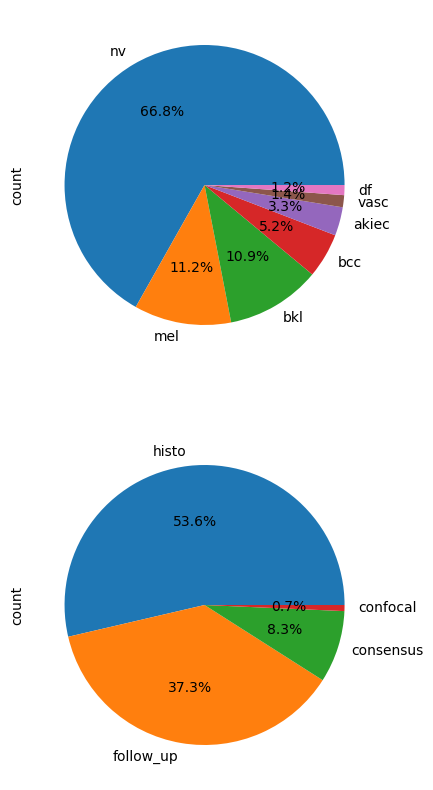

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(2,1,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

1.  Type of skin disease:
    *     nv: Melanocytic nevi - 69.9%
    *     mel: Melanoma - 11.1%
    *     bkl: Benign keratosis-like lesions - 11.0%
    *     bcc: Basal cell carcinoma - 5.1%
    *     akiec: Actinic keratoses- 3.3%
    *     vasc: Vascular lesions-1.4%
    *     df: Dermatofibroma - 1.1%

2. How the skin disease was discovered:
   * histo - histopathology - 53.3%
   * follow_up - follow up examination - 37.0%
   * consensus - expert consensus - 9.0%
   * confocal - confirmation by in-vivo confocal microscopy - 0.7%

#### BIVARIATE ANALYSIS

<Axes: title={'center': 'LOCALIZATION VS GENDER'}, xlabel='count', ylabel='localization'>

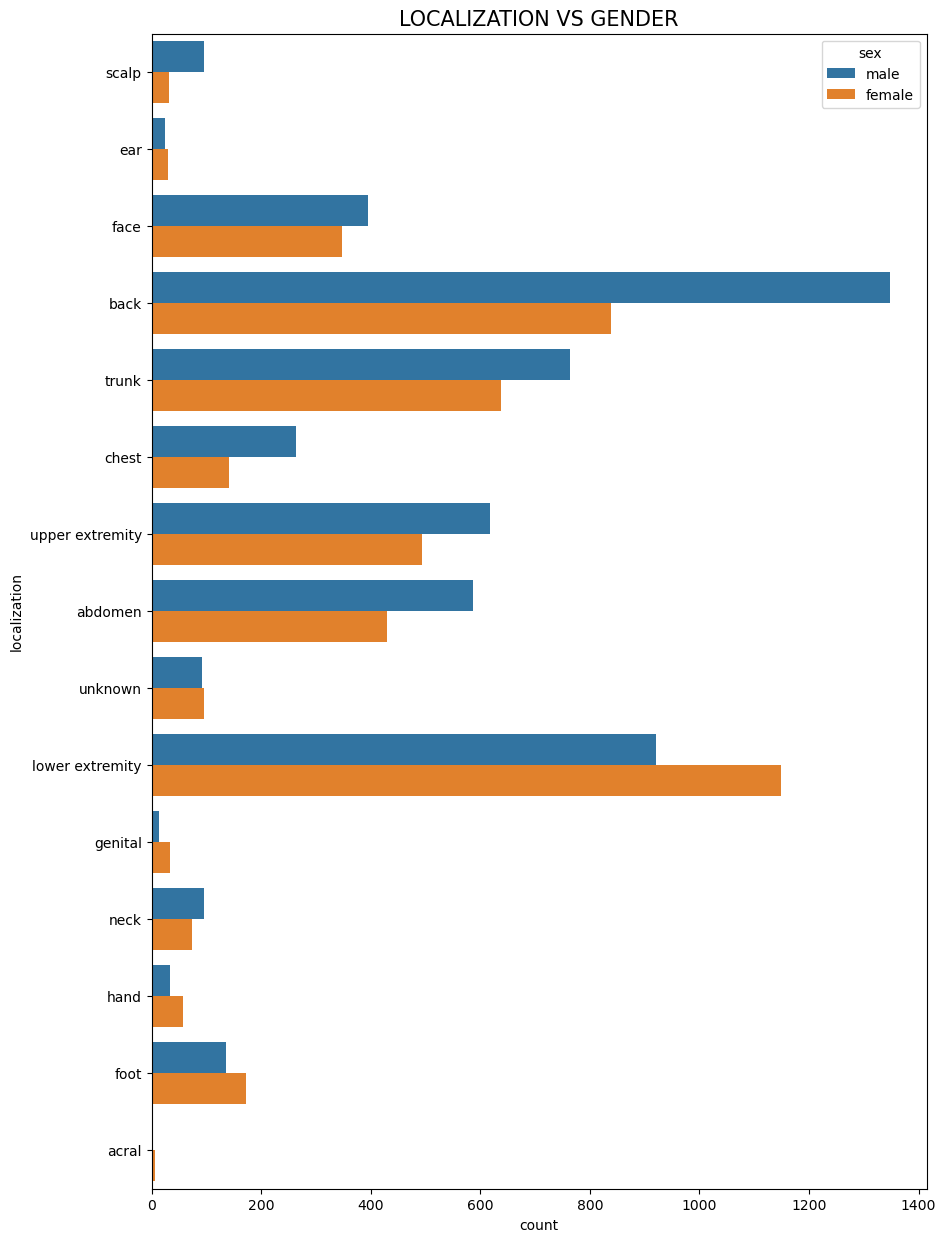

In [19]:
plt.figure(figsize=(10,15))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

* Back are is the most affected among people and more prominent in men.
* Infection on Lower extremity of the body is more visible in women.
* Some unknown regions also show infections and it's visible in men, women and other genders.
* The acral surfaces show the least infection cases that presents in men only. Other gender groups don't show this kind of infection.


<Axes: title={'center': 'LOCALIZATION VS CELL TYPE'}, xlabel='count', ylabel='localization'>

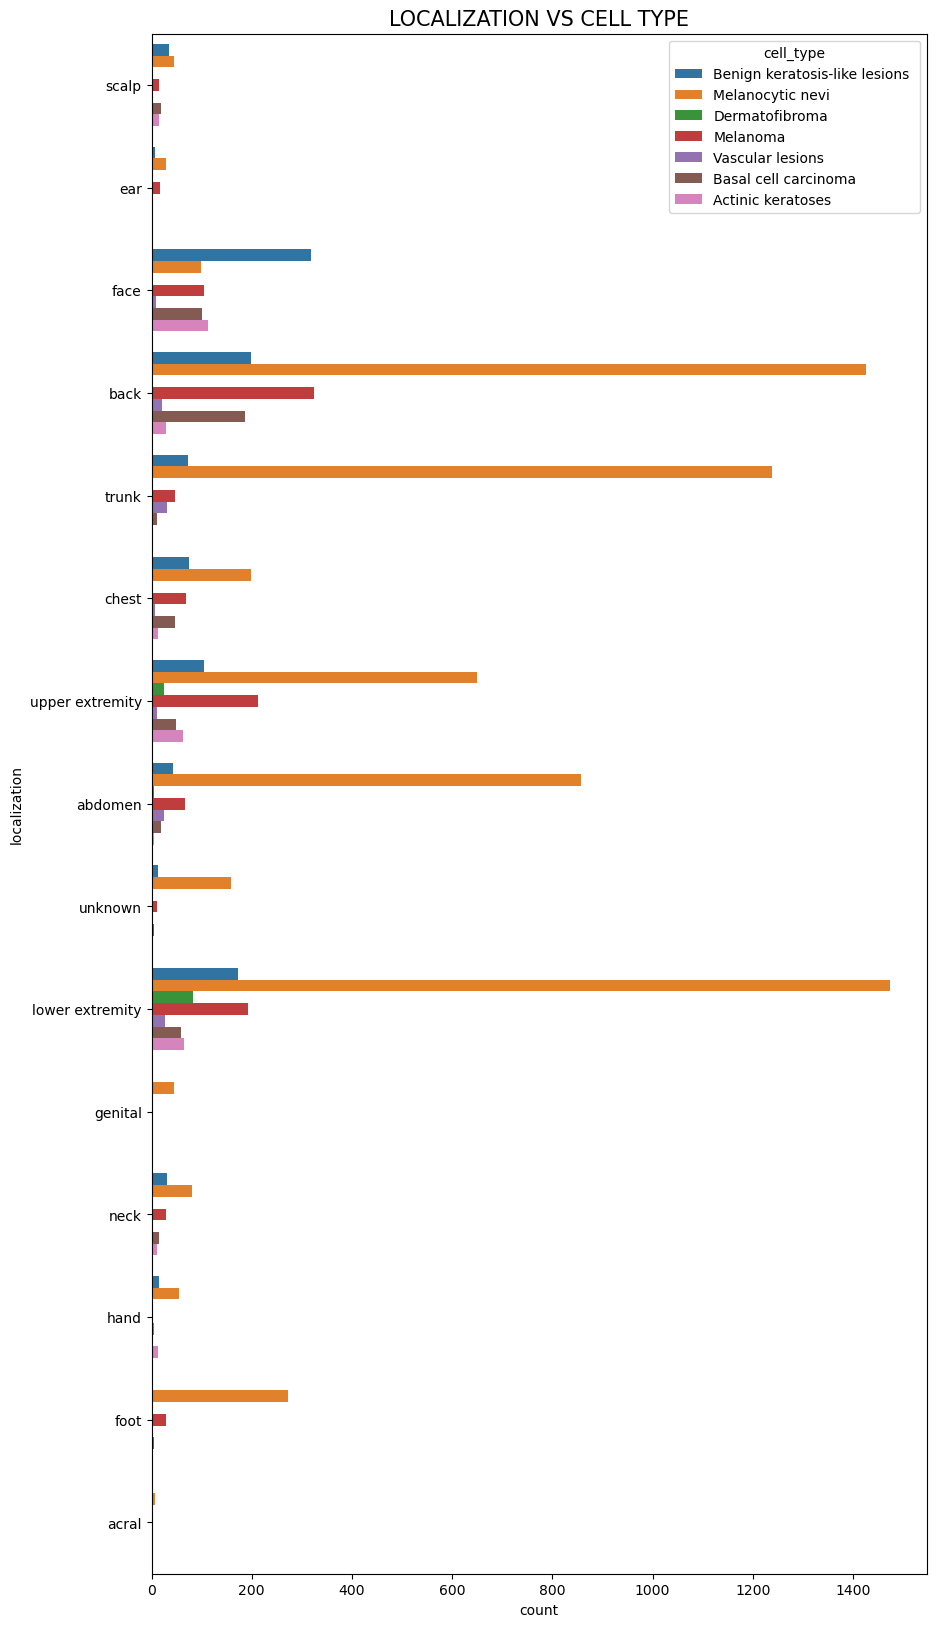

In [20]:
plt.figure(figsize=(10,20))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)

* The face is infected the most by Benign keratosis-like lesions.
* Body parts(except face) are infected the most by Melanocytic nevi.
* Dermatofibroma presents only on upper extremity and lower extremity.

<Axes: title={'center': 'GENDER VS CELL TYPE'}, xlabel='count', ylabel='sex'>

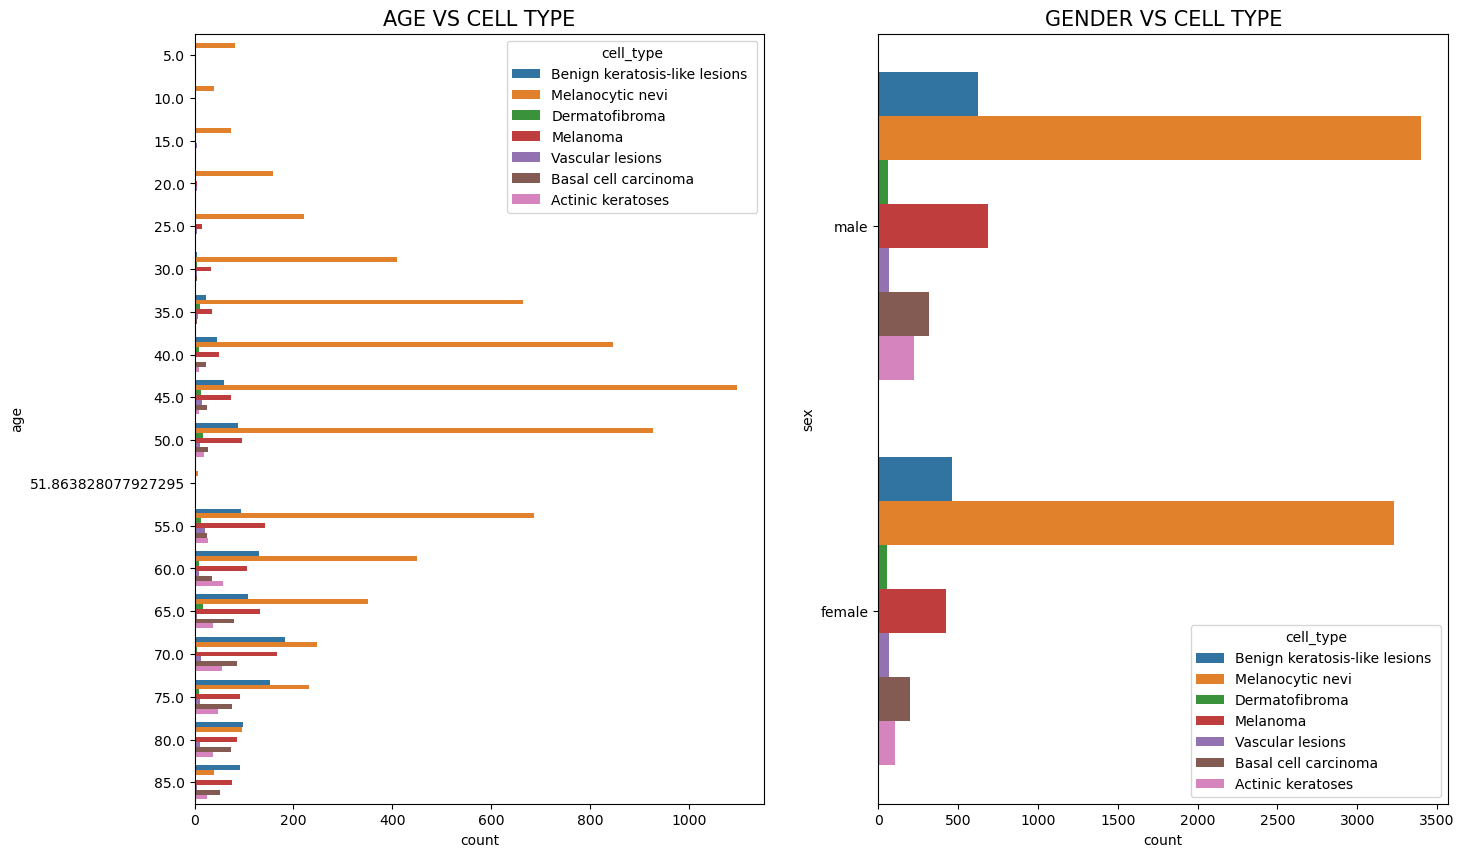

In [21]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

1. The age group between 0-75 years is infected the most by Melanocytic nevi. On the other hand, the people aged 80-90 are affected more by Benign keratosis-like lesions.

2. All the gender groups are affected the most by Melanocytic nevi.

In [1]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

## **ANN**

### A simple neural network is implemented first with the following layers to get patterns in images. The accuracy achieved is approximately 69 percent.

In [10]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [24]:
features.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  C:\Users\web\Downloads\image\HAM10000_images_p...   
1  C:\Users\web\Downloads\image\HAM10000_images_p...   
2  C:\Users\web\Downloads\image\HAM10000_images_p...   
3  C:\Users\web\Downloads\image\HAM10000_images_p...   
4  C:\Users\web\Downloads\image\HAM10000_images_p...   

                        cell_type  \
0  Benign keratosis-like lesions    
1  Benign keratosis-like lesions    
2  Benign keratosis-like lesions    
3  Benign keratosis-like lesions    
4  Benign keratosis-like lesions    

                                               image  
0  [[[189, 152, 194], [192, 156, 198], [191, 154,...  
1  [[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2...  
2  [[[186, 127, 135], [189, 133, 145], [192, 135,...  
3  [[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4...  
4  [[[131, 88, 110], [142, 97, 120], [152, 107, 1...

In [25]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0])>)

In [26]:
# Scaling of the training and testing data via sdandard scaling
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [27]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [28]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [29]:
y_validate.shape

(744, 7)

In [30]:
x_train = x_train.reshape(6696,125*100*3)
x_test = x_test.reshape(2481,125*100*3)
x_validate = x_validate.reshape(744,125*100*3)
print(x_train.shape)
print(x_test.shape)

(6696, 37500)
(2481, 37500)


In [5]:
# define the keras model
model = Sequential()
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 37500))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,beta_1 = 0.9,beta_2 = 0.999,epsilon = 1e-8)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', losspatience=5, restore_best_weights=True  # Revert to the best weights)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │       2,400,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,412,999 (9.20 MB)

 Trainable params: 2,412,999 (9.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_validate, y_validate),
    batch_size=10,
    epochs=20,  # You can still set the max number of epochs
    callbacks=[early_stopping]
)

accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

- As we used early stopping, our ANN model stopped only in 11 epochs because after epoch 7 val_loss is decreasing
- our original accuracy is 70.37% and testing accuracy is 70.57% . these ensures no overfitting.
- hence, using ANN we reached to 70 % accury which is quite good but we can improve it more vie CNN

In [89]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **CNN**

CNN is ideal for image classification. It is better since CNN has features parameter sharing and dimensionality reduction. Because of parameter sharing in CNN, the number of parameters is reduced thus the computations get decreased.


### Applied Data augmentation using ImageDatagenerator before model training

Since the data is less, we apply data augmentation using ImageDataGenerator.

ImageDataGenerator generates augmentation of images in real-time while the model is still training. One can apply any random transformations on each training image as it is passed to the model.

#### The CNN model is a repeated network of the following layers:

1. Convolutional
1. Pooling
1. Dropout
1. Flatten
1. Dense

Optimizer: Adam

Activation function used: Softmax


In [10]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']
print(features.shape)
print(target.shape)

(9921, 10)
(9921,)


In [11]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)


In [12]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [13]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [14]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [15]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))


# Convert data to float32
x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_validate = y_validate.astype('float32')
y_test = y_test.astype('float32')


In [59]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*3 -> Flatten -> Dense*2 -> Dropout -> Out
input_shap = (100, 125, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same', input_shape=input_shap))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same'))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

C:\Users\web\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 125, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11520)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,949,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,067,239 (11.70 MB)

 Trainable params: 3,067,239 (11.70 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Define the optimizer
optimizer = Adam(learning_rate=0.0001, beta_1=0.9,
                 beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer ,
              loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# Define EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss',patience=5,verbose=1,  restore_best_weights=True)  

#### data Augmentation

In [60]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        rescale = 1/255)  
datagen.fit(x_train)

In [20]:
batch_size = 16
epochs = 50
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
x_batch, y_batch = train_generator[0]
print("x_batch shape:", x_batch.shape)
print("y_batch shape:", y_batch.shape)
print(f"x_validate shape: {x_validate.shape}, y_validate shape: {y_validate.shape}")


x_batch shape: (16, 100, 125, 3)
y_batch shape: (16, 7)
x_validate shape: (794, 100, 125, 3), y_validate shape: (794, 7)


In [27]:
# Training the model
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

history = model.fit(
    train_generator,  
    epochs=epochs,
    validation_data=(x_validate, y_validate),  
    verbose=1,
    steps_per_epoch=len(train_generator),  
    callbacks=[learning_rate_reduction]  )

Epoch 1/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 152s 319ms/step - accuracy: 0.6509 - loss: 1.2908 - val_accuracy: 0.6662 - val_loss: 155.7831 - learning_rate: 1.0000e-04
Epoch 2/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 133s 296ms/step - accuracy: 0.6755 - loss: 1.0378 - val_accuracy: 0.6662 - val_loss: 319.6214 - learning_rate: 1.0000e-04
Epoch 3/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 133s 297ms/step - accuracy: 0.6683 - loss: 0.9710 - val_accuracy: 0.6662 - val_loss: 323.0280 - learning_rate: 1.0000e-04
Epoch 4/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 135s 301ms/step - accuracy: 0.6809 - loss: 0.9261 - val_accuracy: 0.6662 - val_loss: 234.4607 - learning_rate: 1.0000e-04
Epoch 5/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.6744 - loss: 0.9274
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
447/447 ━━━━━━━━━━━━━━━━━━━━ 132s 296ms/step - accuracy: 0.6744 - loss: 0.9273 - val_accuracy: 0.6662 - val_loss: 319.3437 - learning_rate: 1.0000e-04
Epoch 6/50
447/447 ━━━━━━━━━━━━━━━━━━

In [162]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [47]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.6511 - loss: 164.6584
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6621 - loss: 159.1653


Validation: accuracy = 0.666247  ;  loss_v = 157.360413
Test: accuracy = 0.654912  ;  loss = 161.899796


## **Tranfer Learning**

### Due to lack of dataset, pretrained model of MobileNet is used.

#### Why MobileNet?
MobileNet significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.

The 2 layers in addition to the ones used for CNN are:
Batch Normalization
Zero Padding


In [10]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [19]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,125))))

In [22]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [23]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0])>)

In [66]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [67]:
print(x_train.shape)
print(y_train.shape)

(7440, 125, 100, 3)
(7440, 7)


In [68]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [31]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.1/38.8 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.2/38.8 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.3/38.8 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.3/38.8 MB 1.5 MB/s eta 0:00:26
   ---------------------------------------- 0.4/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.5/38.8 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.5/38.8 MB 1.2 MB/s eta 0:00:32
    --------------------------------------- 0.5/38.8 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.6/38.8 MB 1.2 MB/s eta 0:00:34
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0:00:35
    --

In [69]:
from PIL import Image
import numpy as np

def resize_images(images, target_shape=(224, 224)):
    resized_images = []
    for image in images:
        # Convert the image data type to uint8
        image = np.clip(image, 0, 255).astype(np.uint8)  # Ensure the pixel values are in the valid range (0-255)
        
        pil_image = Image.fromarray(image)  # Convert NumPy array to PIL Image
        resized_image = pil_image.resize(target_shape)  # Resize image
        resized_images.append(np.array(resized_image))  # Convert back to NumPy array
    
    return np.array(resized_images)

# Resize x_train, x_validate, x_test to (224, 224)
x_train_resized = resize_images(x_train, target_shape=(224, 224))
x_validate_resized = resize_images(x_validate, target_shape=(224, 224))
x_test_resized = resize_images(x_test, target_shape=(224, 224))


In [70]:
x_train = x_train_resized
x_test  = x_test_resized
x_validate  = x_validate_resized

In [71]:
print(x_train.shape)
print(y_train.shape)

(7440, 224, 224, 3)
(7440, 7)


In [1]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(224, 224, 3))
x_test = x_test.reshape(x_test.shape[0], *(224, 224, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(224, 224, 3))
print(x_train.shape)

In [72]:
print(x_train.shape)  # Shape of x_train before reshaping
print(x_test.shape)   # Shape of x_test before reshaping
print(x_validate.shape) 

(7440, 224, 224, 3)
(2481, 224, 224, 3)
(744, 224, 224, 3)


In [36]:
# create a copy of a mobilenet model

mobile = tensorflow.keras.applications.mobilenet.MobileNet()
mobile.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [37]:
def change_model(model, new_input_shape=(None, 40, 40, 3),custom_objects=None):
    # replace input shape of first layer
    
    config = model.layers[0].get_config()
    config['batch_input_shape']=new_input_shape
    model._layers[0]=model.layers[0].from_config(config)

    # rebuild model architecture by exporting and importing via json
    new_model = tensorflow.keras.models.model_from_json(model.to_json(),custom_objects=custom_objects)

    # copy weights from old model to new one
    for layer in new_model._layers:
        try:
            layer.set_weights(model.get_layer(name=layer.name).get_weights())
            print("Loaded layer {}".format(layer.name))
        except:
            print("Could not transfer weights for layer {}".format(layer.name))

    return new_model

In [38]:
new_model = change_model(mobile, new_input_shape=[None] + [100,125,3])
new_model.summary()

Loaded layer input_layer
Loaded layer conv1
Loaded layer conv1_bn
Loaded layer conv1_relu
Loaded layer conv_dw_1
Loaded layer conv_dw_1_bn
Loaded layer conv_dw_1_relu
Loaded layer conv_pw_1
Loaded layer conv_pw_1_bn
Loaded layer conv_pw_1_relu
Loaded layer conv_pad_2
Loaded layer conv_dw_2
Loaded layer conv_dw_2_bn
Loaded layer conv_dw_2_relu
Loaded layer conv_pw_2
Loaded layer conv_pw_2_bn
Loaded layer conv_pw_2_relu
Loaded layer conv_dw_3
Loaded layer conv_dw_3_bn
Loaded layer conv_dw_3_relu
Loaded layer conv_pw_3
Loaded layer conv_pw_3_bn
Loaded layer conv_pw_3_relu
Loaded layer conv_pad_4
Loaded layer conv_dw_4
Loaded layer conv_dw_4_bn
Loaded layer conv_dw_4_relu
Loaded layer conv_pw_4
Loaded layer conv_pw_4_bn
Loaded layer conv_pw_4_relu
Loaded layer conv_dw_5
Loaded layer conv_dw_5_bn
Loaded layer conv_dw_5_relu
Loaded layer conv_pw_5
Loaded layer conv_pw_5_bn
Loaded layer conv_pw_5_relu
Loaded layer conv_pad_6
Loaded layer conv_dw_6
Loaded layer conv_dw_6_bn
Loaded layer conv_d

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [39]:
# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = new_model.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=new_model.input, outputs=predictions)

In [40]:
# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

In [48]:
# Define Top2 and Top3 Accuracy

from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from tensorflow.keras.optimizers import Adam

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [52]:
model.compile(optimizer = Adam(learning_rate=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])



In [73]:
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        rescale = 1/255)  
datagen.fit(x_train)

In [74]:
batch_size = 16
epochs = 50
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
x_batch, y_batch = train_generator[0]
print("x_batch shape:", x_batch.shape)
print("y_batch shape:", y_batch.shape)
print(f"x_validate shape: {x_validate.shape}, y_validate shape: {y_validate.shape}")


x_batch shape: (16, 224, 224, 3)
y_batch shape: (16, 7)
x_validate shape: (744, 224, 224, 3), y_validate shape: (744, 7)


In [76]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np

# Step 1: Create ImageDataGenerator for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validate_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize for validation

# Step 2: Create data generators to load images in batches
train_generator = train_datagen.flow_from_directory(
    'path_to_train_data',  # Replace with the path to your training data
    target_size=(224, 224),  # Resize images
    batch_size=32,           # Adjust batch size based on your memory capacity
    class_mode='categorical',  # Assumes one-hot encoding of labels
    shuffle=True
)

validation_generator = validate_datagen.flow_from_directory(
    'path_to_validate_data',  # Replace with the path to your validation data
    target_size=(224, 224),   # Resize images
    batch_size=32,            # Adjust batch size based on your memory capacity
    class_mode='categorical',  # Assumes one-hot encoding of labels
    shuffle=False
)

# Step 3: Define the MobileNet model (same as before)
mobile = MobileNet(input_shape=(224, 224, 3), include_top=False)  # Base MobileNet without the top layer
new_model = models.Sequential()
new_model.add(mobile)  # Add the base MobileNet model

# Add custom top layers for fine-tuning
new_model.add(layers.GlobalAveragePooling2D())
new_model.add(layers.Dense(1024, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(num_classes, activation='softmax'))  # Assuming `num_classes` is defined

# Step 4: Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Compute class weights (if necessary)
class_weights = class_weight.compute_class_weight(
    'balanced', 
    classes=np.unique(np.argmax(y_train, axis=1)),  # Use argmax for one-hot encoded labels
    y=np.argmax(y_train, axis=1)
)

# Step 6: Define callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('model_best.h5', save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

callbacks_list = [checkpoint, reduce_lr]

# Step 7: Train the model using the data generators
history = new_model.fit(
    train_generator,  
    class_weight=class_weights,  # Apply class weights
    epochs=10,
    validation_data=validation_generator,  
    verbose=1,
    steps_per_epoch=train_generator.samples // 32,  # Steps per epoch based on batch size
    validation_steps=validation_generator.samples // 32,  # Validation steps based on batch size
    callbacks=callbacks_list
)
  

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

In [ ]:
# Here the the last epoch will be used.

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate(datagen.flow(x_test,y_test, batch_size=16) )

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

In [ ]:
# Here the best epoch will be used.

model.load_weights('model.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(datagen.flow(x_test,y_test, batch_size=16) 
                        )

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

### Plot the Training Curves

In [ ]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

In [ ]:
accuracy = model.evaluate(x_test, y_test,verbose=1)[1]
accuracy_v = model.evaluate(x_validate, y_validate)[1]
print("Validation: accuracy = ", accuracy_v)
print("Test: accuracy = ",accuracy)
model.save("model.h5")